In [45]:
import MetaTrader5 as mt5
import pandas as pd
import time
from datetime import datetime, timedelta
import ta
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')


Making a master dataframe which contains the OHLCV prices for currency pairs

In [78]:

mt5.initialize()

symbols = ['XAUUSD', 'EURUSD', 'GBPUSD', 'AUDUSD', 'GBPJPY', 'USDJPY', 'NZDUSD',  'USDCAD', 'AUDNZD' , 'EURGBP', 'SP500USD', 'BTCUSD' ]
timeframe = mt5.TIMEFRAME_H1
start_date = datetime(2024, 1, 1)
end_time = datetime.now()
    
def get_data(symbol, timeframe, start_date, end_time):
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_time)
    df = pd.DataFrame(rates)
    df = df[['time','close']]
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

symbols_data = {}

for symbol in symbols:
    symbols_data[symbol] = get_data(symbol, timeframe, start_date, end_time)
    
# Concatenate data for each symbol into a single DataFrame
symbols_data_concatenated = pd.concat(symbols_data, axis=1)


symbols_data_concatenated



,XAUUSD,EURUSD,GBPUSD,AUDUSD,GBPJPY,USDJPY,NZDUSD,USDCAD,AUDNZD,EURGBP,SP500USD,BTCUSD
,close,close,close,close,close,close,close,close,close,close,close,close
time,,,,,,,,,,,,
2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42293.6380
2024-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42312.7380
2024-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42502.3380
2024-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42646.7380
2024-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42619.2380
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-15 08:00:00,2361.12,1.06578,1.24664,0.64902,191.762,153.826,0.59500,1.37486,1.09070,0.85492,5148.73,65426.8380
2024-04-15 09:00:00,2354.84,1.06545,1.24725,0.64835,191.912,153.871,0.59427,1.37512,1.09093,0.85421,5149.73,66425.6621


Plotting a correlation graph for the close prices of the currency pairs

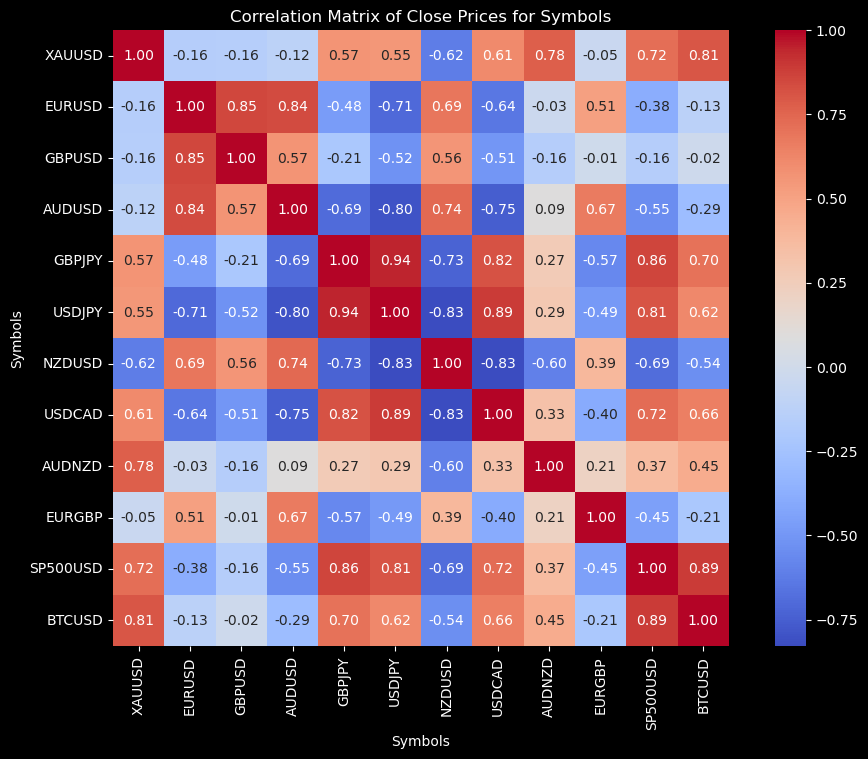

In [79]:
# Extract close prices for each symbol
close_prices = symbols_data_concatenated.xs('close', axis=1, level=1)

# Calculate correlation matrix
correlation_matrix = close_prices.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Close Prices for Symbols')
plt.xlabel('Symbols')
plt.ylabel('Symbols')
plt.show()

Plotting currency pairs so see price movement correlation


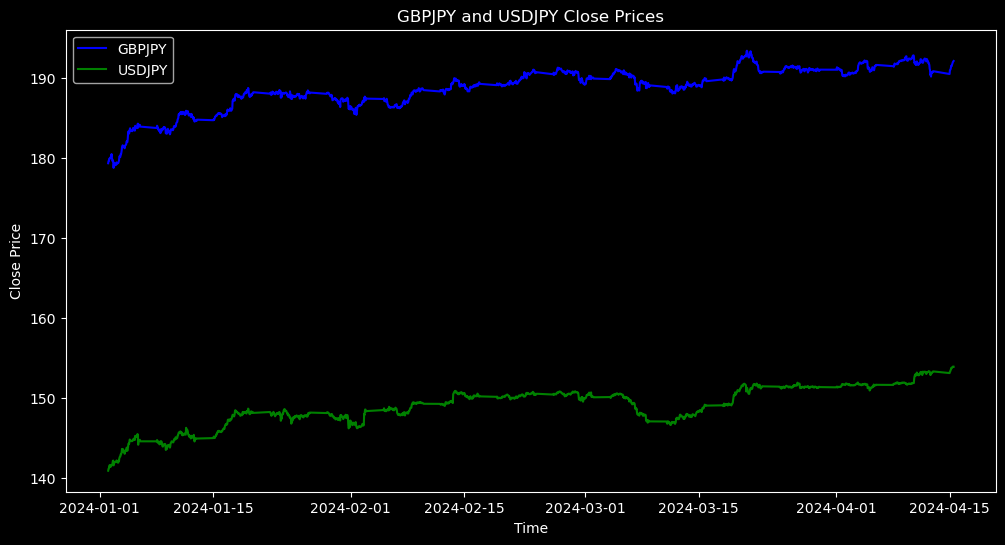

In [73]:
# Extract close prices for GBPJPY and USDJPY
symbol1 = symbols_data_concatenated['GBPJPY']['close'].dropna()
symbol2 = symbols_data_concatenated['USDJPY']['close'].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(symbol1.index, symbol1.values, label='GBPJPY', color='blue')
plt.plot(symbol2.index, symbol2.values, label='USDJPY', color='green')
plt.title('GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(False)
plt.show()

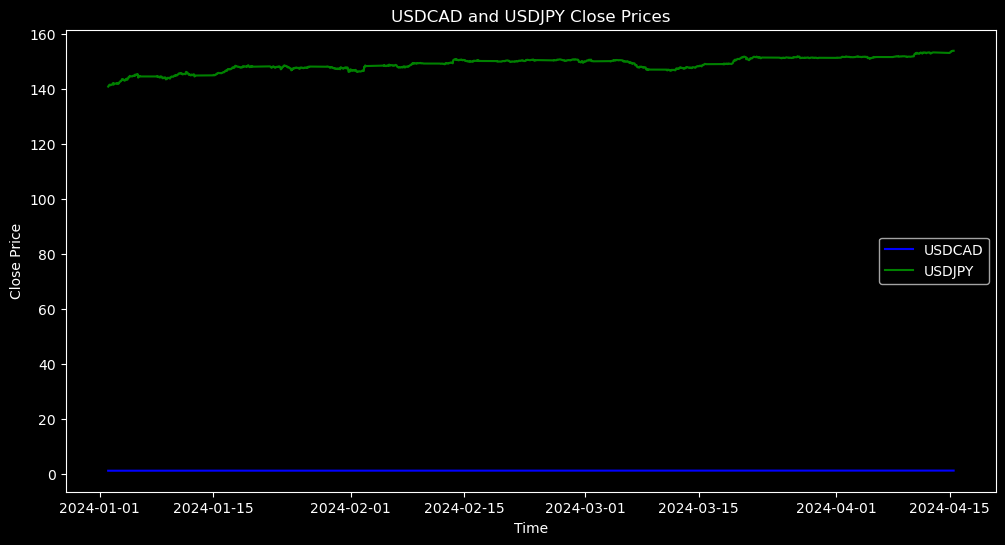

In [84]:
# Extract close prices for GBPJPY and USDJPY
symbol3 = symbols_data_concatenated['USDCAD']['close'].dropna()
symbol4 = symbols_data_concatenated['USDJPY']['close'].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(symbol3.index, symbol3.values, label='USDCAD', color='blue')
plt.plot(symbol4.index, symbol4.values, label='USDJPY', color='green')
plt.title('USDCAD and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(False)
plt.show()

Constructing a chart for the difference between the pairs

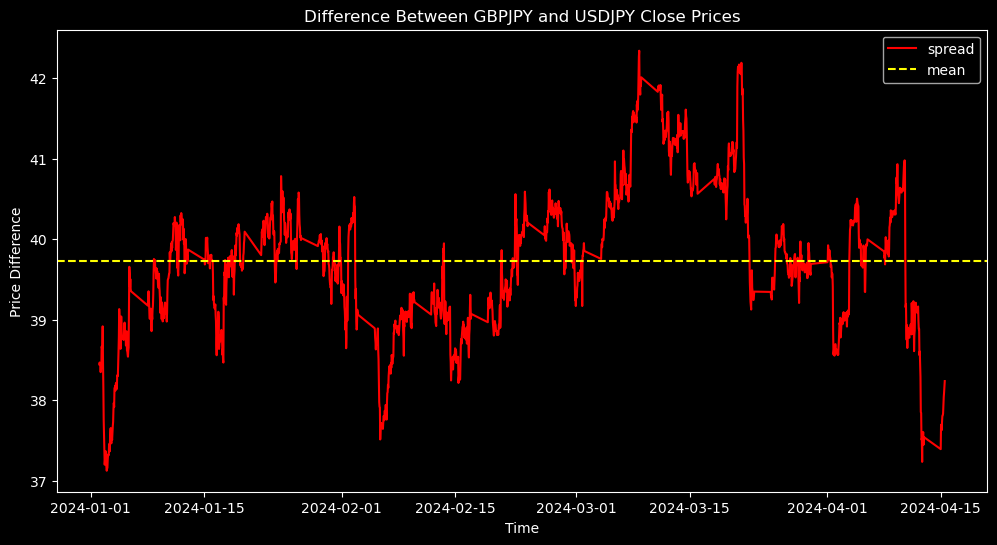

In [83]:
# Calculate the difference between USDJPY and GBPJPY close prices
price_diff = symbol1 - symbol2

price_diff = price_diff.dropna()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(price_diff.index, price_diff.values, label='Difference (GBPJPY - USDJPY)', color='red')
plt.axhline(price_diff.mean(), color = 'yellow', linestyle = '--')
plt.title('Difference Between GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.legend(['spread', 'mean'])
plt.grid(False)
plt.show()

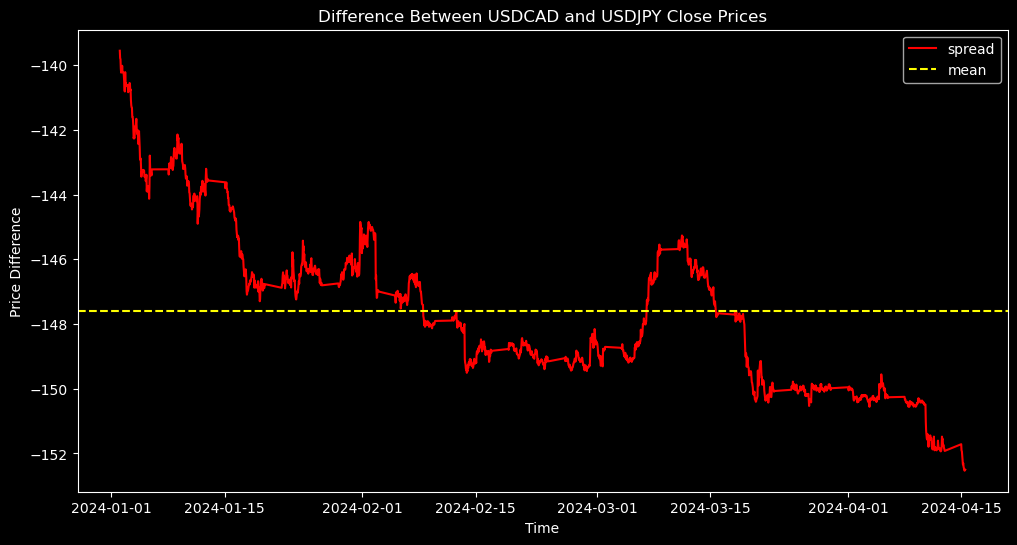

In [86]:
# Calculate the difference between USDJPY and GBPJPY close prices
price_diff2 = symbol3 - symbol4

price_diff2 = price_diff2.dropna()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(price_diff2.index, price_diff2.values, label='Difference (USDCAD - USDJPY)', color='red')
plt.axhline(price_diff2.mean(), color = 'yellow', linestyle = '--')
plt.title('Difference Between USDCAD and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.legend(['spread', 'mean'])
plt.grid(False)
plt.show()

Cointegration

In [68]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(price_diff.dropna())

# Extracting test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. The series is stationary.')
else:
    print('Fail to reject the null hypothesis. The series is not stationary.')

ADF Statistic: -2.979296227169958
p-value: 0.03687363154316153
Reject the null hypothesis. The series is stationary.


In [76]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(price_diff2.dropna())

# Extracting test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. The series is stationary.')
else:
    print('Fail to reject the null hypothesis. The series is not stationary.')

ADF Statistic: -2.4665878148570153
p-value: 0.12381692961678281
Fail to reject the null hypothesis. The series is not stationary.
